Column Names: 

1. **GDP growth (annual %)**: The yearly percentage increase in the country's total economic output, measured at constant local currency prices.

2. **Inflation, consumer prices (annual %)**: The yearly percentage change in the average cost of a fixed basket of consumer goods and services.

3. **Consumer price index (2010 = 100)**: A measure that tracks changes in the cost of a typical basket of goods and services, using 2010 as the base year.

4. **Unemployment, total (% of total labor force)**: The proportion of the labor force actively seeking but not finding employment.

5. **Merchandise imports (current US\$)**: The value of goods brought into a country from abroad, measured in current U.S. dollars.

6. **S\&P Global Equity Indices (annual % change)**: The yearly percentage change in global stock market prices as tracked by S\&P indices.

7. **Foreign direct investment, net inflows (% of GDP)**: The percentage of the country's GDP represented by foreign investments coming into the country.

8. **Final consumption expenditure (% of GDP)**: The proportion of GDP spent on household and government consumption of goods and services.

9. **Tariff rate, applied, weighted mean, all products (%)**: The average tariff rate on all imported products, weighted by the value of each product category.

10. **Tariff rate, applied, weighted mean, manufactured products (%)**: The average tariff rate on imported manufactured products, weighted by the value of each category.

**Task 1: Data Collection and Cleaning**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Dataset 3.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Country Name                                                                           60 non-null     object 
 1   Country Code                                                                           60 non-null     object 
 2   Time                                                                                   60 non-null     int64  
 3   Time Code                                                                              60 non-null     object 
 4   GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                                              60 non-null     object 
 5   Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                          

In [4]:
data.replace('..', np.nan, inplace=True)
rows_to_drop = data[data['Time'].between(2015, 2017)].index
data = data.drop(rows_to_drop)

In [5]:
# Convert numeric columns to float
for col in data.columns[4:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [6]:
# Split data by country
countries = data['Country Name'].unique()
country_dfs = {}

In [7]:
for country in countries:
    country_df = data[data['Country Name'] == country].copy()
    # Replace missing values with the median for each column
    for col in country_df.columns[4:]:
        if country_df[col].notna().sum() > 0:
            median_value = country_df[col].median()
        else:
            median_value = 0  # or any default value you deem appropriate
        country_df[col] = country_df[col].fillna(median_value)
    country_dfs[country] = country_df

In [8]:
# Display information about each country's dataframe
for country, df in country_dfs.items():
    print(f'Data for {country}:')
    display(df)  
    print('\n')

Data for China:


,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT],S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",Final consumption expenditure (% of GDP) [NE.CON.TOTL.ZS],"Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Tariff rate, applied, weighted mean, manufactured products (%) [TM.TAX.MANF.WM.AR.ZS]"
3,China,CHN,2018,YR2018,6.749774,2.074790,121.558878,4.310,2.140000e+12,-20.515480,1.693894,55.057689,3.39,4.29
4,China,CHN,2019,YR2019,5.950501,2.899234,125.083154,4.560,2.080000e+12,19.261354,1.310716,56.018573,2.53,3.13
5,China,CHN,2020,YR2020,2.238638,2.419422,128.109444,5.000,2.070000e+12,27.872233,1.723176,55.330446,2.47,2.74
6,China,CHN,2021,YR2021,8.448469,0.981015,129.366217,4.550,2.680000e+12,-20.647621,1.930786,53.921704,2.31,2.57
7,China,CHN,2022,YR2022,2.950670,1.973576,131.919357,4.980,2.710000e+12,-23.624844,1.063674,53.441939,2.18,2.45
8,China,CHN,2023,YR2023,5.249558,0.234837,132.229152,4.670,2.560000e+12,-20.515480,0.240114,55.637835,2.47,2.74
9,China,CHN,2024,YR2024,5.600029,0.218129,132.517582,4.571,2.350000e+12,-20.515480,1.502305,55.194067,2.47,2.74




Data for Korea, Rep.:


,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT],S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",Final consumption expenditure (% of GDP) [NE.CON.TOTL.ZS],"Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Tariff rate, applied, weighted mean, manufactured products (%) [TM.TAX.MANF.WM.AR.ZS]"
13,"Korea, Rep.",KOR,2018,YR2018,2.907404,1.475839,114.719259,3.824,5.350000e+11,-21.894579,0.706085,64.075100,4.830,2.26
14,"Korea, Rep.",KOR,2019,YR2019,2.243978,0.383000,115.158634,3.746,5.030000e+11,7.219897,0.583394,65.710483,5.165,1.86
15,"Korea, Rep.",KOR,2020,YR2020,-0.709415,0.537288,115.777368,3.931,4.680000e+11,44.139519,0.533043,64.430279,5.480,1.93
16,"Korea, Rep.",KOR,2021,YR2021,4.304735,2.498333,118.669872,3.639,6.150000e+11,-6.966000,1.213155,64.117799,4.850,1.15
17,"Korea, Rep.",KOR,2022,YR2022,2.612672,5.089514,124.709592,2.857,7.310000e+11,-31.384287,1.496174,66.847990,5.660,1.79
18,"Korea, Rep.",KOR,2023,YR2023,1.356733,3.597456,129.195965,2.675,6.430000e+11,-6.966000,0.886178,67.826113,5.165,1.86
19,"Korea, Rep.",KOR,2024,YR2024,2.428325,2.321743,132.195563,2.604,5.750000e+11,-6.966000,0.796132,65.070381,5.165,1.86




Data for Malaysia:


,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT],S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",Final consumption expenditure (% of GDP) [NE.CON.TOTL.ZS],"Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Tariff rate, applied, weighted mean, manufactured products (%) [TM.TAX.MANF.WM.AR.ZS]"
23,Malaysia,MYS,2018,YR2018,4.843087,0.884709,120.663223,3.300,2.180000e+11,-12.650988,2.314587,69.395263,3.60,3.85
24,Malaysia,MYS,2019,YR2019,4.413187,0.662892,121.463089,3.260,2.050000e+11,-0.990757,2.506977,71.424788,3.60,3.85
25,Malaysia,MYS,2020,YR2020,-5.456847,-1.138702,120.079987,4.540,1.910000e+11,4.177564,1.202755,73.974302,3.60,3.85
26,Malaysia,MYS,2021,YR2021,3.315350,2.477102,123.054491,4.640,2.380000e+11,-8.283373,5.416260,70.644175,3.62,3.88
27,Malaysia,MYS,2022,YR2022,8.861822,3.378699,127.212131,3.930,2.940000e+11,-10.937687,3.686893,69.194926,3.42,3.64
28,Malaysia,MYS,2023,YR2023,3.555487,2.488866,130.378270,3.869,2.660000e+11,-8.283373,1.981110,72.430261,3.60,3.85
29,Malaysia,MYS,2024,YR2024,3.984337,1.834100,132.769538,3.826,2.280000e+11,-8.283373,2.410782,71.034482,3.60,3.85




Data for United States:


,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT],S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",Final consumption expenditure (% of GDP) [NE.CON.TOTL.ZS],"Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Tariff rate, applied, weighted mean, manufactured products (%) [TM.TAX.MANF.WM.AR.ZS]"
33,United States,USA,2018,YR2018,2.966505,2.442583,115.157303,3.896,2.610000e+12,-6.237260,1.039454,81.302065,1.59,1.58
34,United States,USA,2019,YR2019,2.583825,1.812210,117.244196,3.669,2.570000e+12,28.878069,1.466965,81.010277,13.78,2.19
35,United States,USA,2020,YR2020,-2.163029,1.233584,118.690502,8.055,2.410000e+12,16.258922,0.641872,81.513648,1.52,1.55
36,United States,USA,2021,YR2021,6.055053,4.697859,124.266414,5.349,2.940000e+12,26.892736,2.009212,82.298422,1.47,1.57
37,United States,USA,2022,YR2022,2.512375,8.002800,134.211206,3.650,3.370000e+12,-19.442824,1.572591,81.737457,1.49,1.61
38,United States,USA,2023,YR2023,2.887556,4.116338,139.735794,3.638,3.170000e+12,16.258922,1.258207,81.335304,1.52,1.58
39,United States,USA,2024,YR2024,2.735691,2.949525,143.857336,4.106,2.775000e+12,16.258922,1.362586,81.424476,1.52,1.58




Data for Viet Nam:


,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT],S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",Final consumption expenditure (% of GDP) [NE.CON.TOTL.ZS],"Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Tariff rate, applied, weighted mean, manufactured products (%) [TM.TAX.MANF.WM.AR.ZS]"
43,Viet Nam,VNM,2018,YR2018,7.465007,3.539628,159.069641,1.161,2.370000e+11,-6.124146,4.998283,66.822779,4.39,2.29
44,Viet Nam,VNM,2019,YR2019,7.359263,2.795824,163.516948,1.681,2.530000e+11,3.565218,4.821075,66.406906,1.66,1.42
45,Viet Nam,VNM,2020,YR2020,2.865413,3.220934,168.783722,2.103,2.630000e+11,17.698191,4.558362,65.445888,1.34,1.05
46,Viet Nam,VNM,2021,YR2021,2.553729,1.834716,171.880423,2.385,3.320000e+11,37.107494,4.273146,65.104112,1.17,0.88
47,Viet Nam,VNM,2022,YR2022,8.123514,3.156508,177.305841,1.523,3.590000e+11,-46.095759,4.362406,63.719954,1.07,0.82
48,Viet Nam,VNM,2023,YR2023,5.046431,3.252893,183.073410,1.645,3.260000e+11,3.565218,4.305159,63.436669,1.34,1.05
49,Viet Nam,VNM,2024,YR2024,6.202847,3.621093,189.702668,1.431,2.945000e+11,3.565218,4.460384,65.275000,1.34,1.05




Data for Germany:


,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT],S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",Final consumption expenditure (% of GDP) [NE.CON.TOTL.ZS],"Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Tariff rate, applied, weighted mean, manufactured products (%) [TM.TAX.MANF.WM.AR.ZS]"
53,Germany,DEU,2018,YR2018,1.116443,1.732169,111.246629,3.384,1.280000e+12,-18.259371,4.004210,72.542340,1.83,1.98
54,Germany,DEU,2019,YR2019,0.987893,1.445660,112.854877,3.163,1.230000e+12,25.476466,1.906987,73.061066,1.84,2.01
55,Germany,DEU,2020,YR2020,-4.095137,0.144878,113.018379,3.881,1.170000e+12,3.545699,4.486666,72.988155,1.48,1.80
56,Germany,DEU,2021,YR2021,3.670000,3.066667,116.484276,3.594,1.420000e+12,15.789159,2.349165,72.380061,1.39,1.43
57,Germany,DEU,2022,YR2022,1.369731,6.872574,124.489744,3.120,1.580000e+12,-12.346791,1.506606,74.482037,1.33,1.64
58,Germany,DEU,2023,YR2023,-0.266438,5.946437,131.892448,3.068,1.480000e+12,3.545699,0.431215,74.321869,1.48,1.80
59,Germany,DEU,2024,YR2024,1.052168,2.256498,134.868599,3.406,1.350000e+12,3.545699,2.128076,73.024610,1.48,1.80


In [9]:
merged_df = pd.concat(country_dfs.values(), ignore_index=True)
merged_df.to_csv('question4.csv', index=False)

**Task 4: Correlation Analysis**

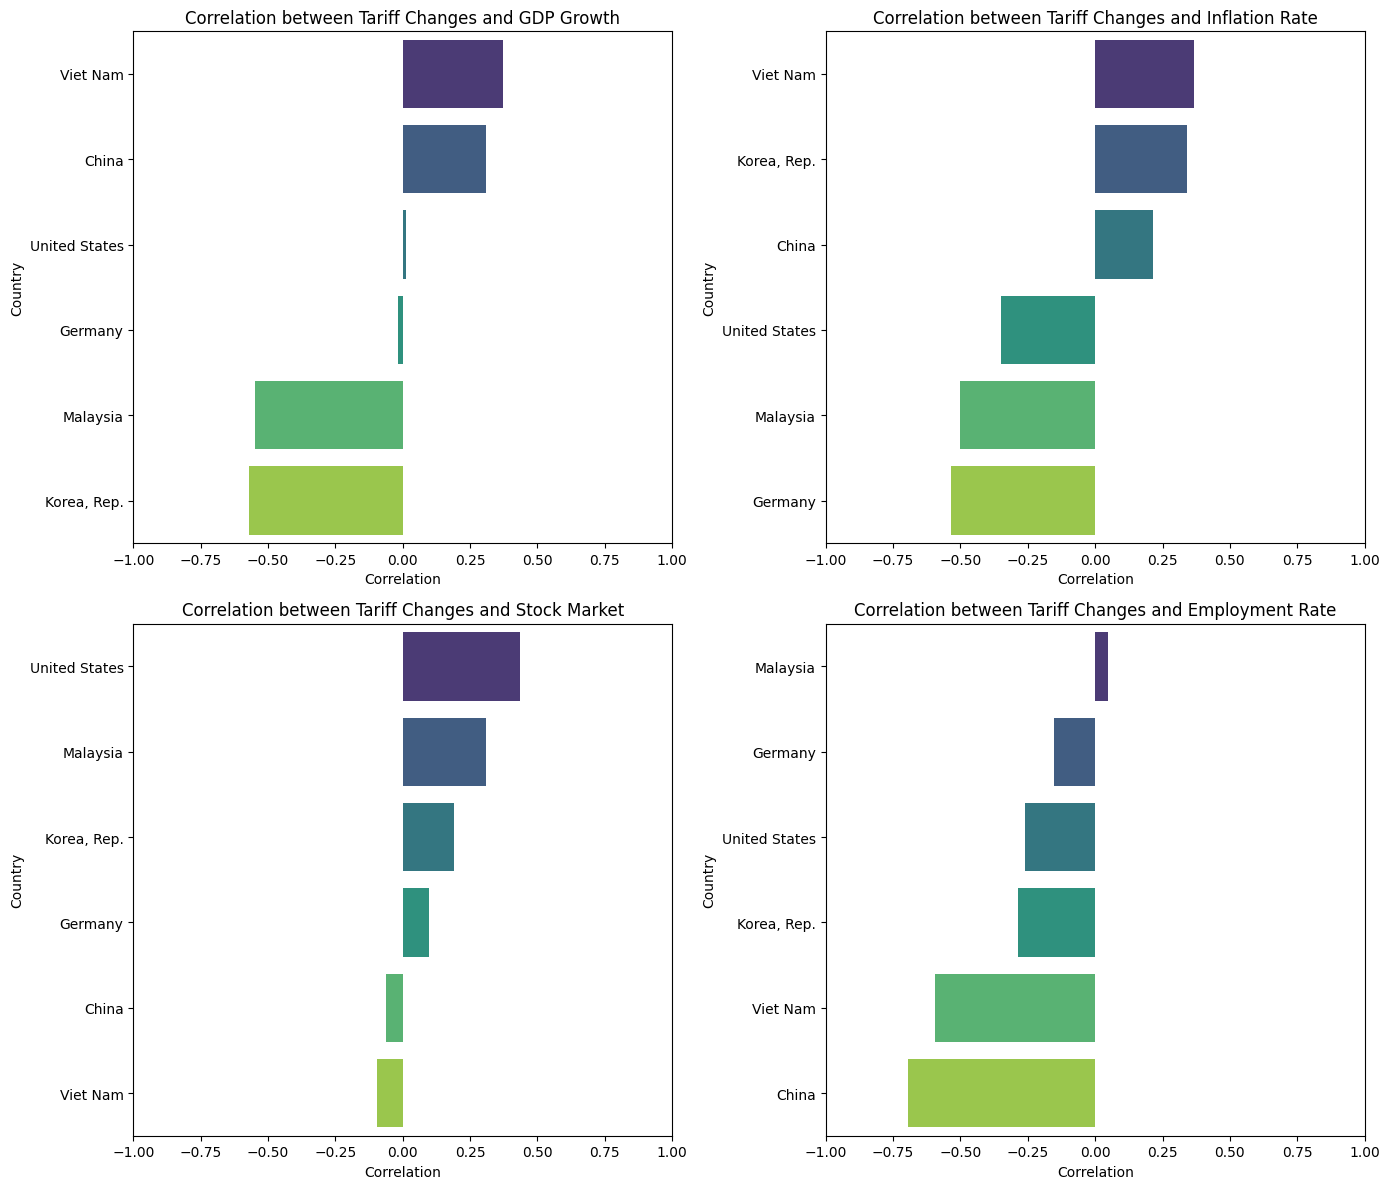

In [10]:
# Prepare the list of economic indicators
indicators = {
    'GDP Growth': 'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
    'Inflation Rate': 'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]',
    'Stock Market': 'S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG]',
    'Employment Rate': 'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]'
}

# Convert relevant columns to numeric
cols_to_convert = list(indicators.values()) + ['Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]']
for col in cols_to_convert:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Initialize a dictionary to store correlations
indicator_correlations = {indicator: [] for indicator in indicators}

# Group by country and calculate correlations
for country in merged_df['Country Name'].unique():
    country_data = merged_df[merged_df['Country Name'] == country]
    
    for indicator, column_name in indicators.items():
        x = country_data[column_name]
        y = country_data['Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]']
        
        # Ensure at least 2 valid data points for correlation
        valid = x.notna() & y.notna()
        if valid.sum() > 1:
            correlation = x[valid].corr(y[valid])
        else:
            correlation = np.nan
        
        indicator_correlations[indicator].append((country, correlation))

# Plot the correlations separately for each indicator
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2x2 grid for 4 indicators
axes = axes.flatten()

for idx, (indicator, correlations) in enumerate(indicator_correlations.items()):
    corr_df = pd.DataFrame(correlations, columns=['Country', 'Correlation'])
    corr_df = corr_df.dropna().sort_values('Correlation', ascending=False)
    
    sns.barplot(data=corr_df, x='Correlation', y='Country', ax=axes[idx],
                hue='Country', palette='viridis', legend=False)
    axes[idx].set_title(f'Correlation between Tariff Changes and {indicator}')
    axes[idx].set_xlim(-1, 1)
    axes[idx].set_xlabel('Correlation')
    axes[idx].set_ylabel('Country')

plt.tight_layout()
plt.show()
fig.savefig('correlation_tariff_economic_indicators.jpg', dpi=300, bbox_inches='tight')

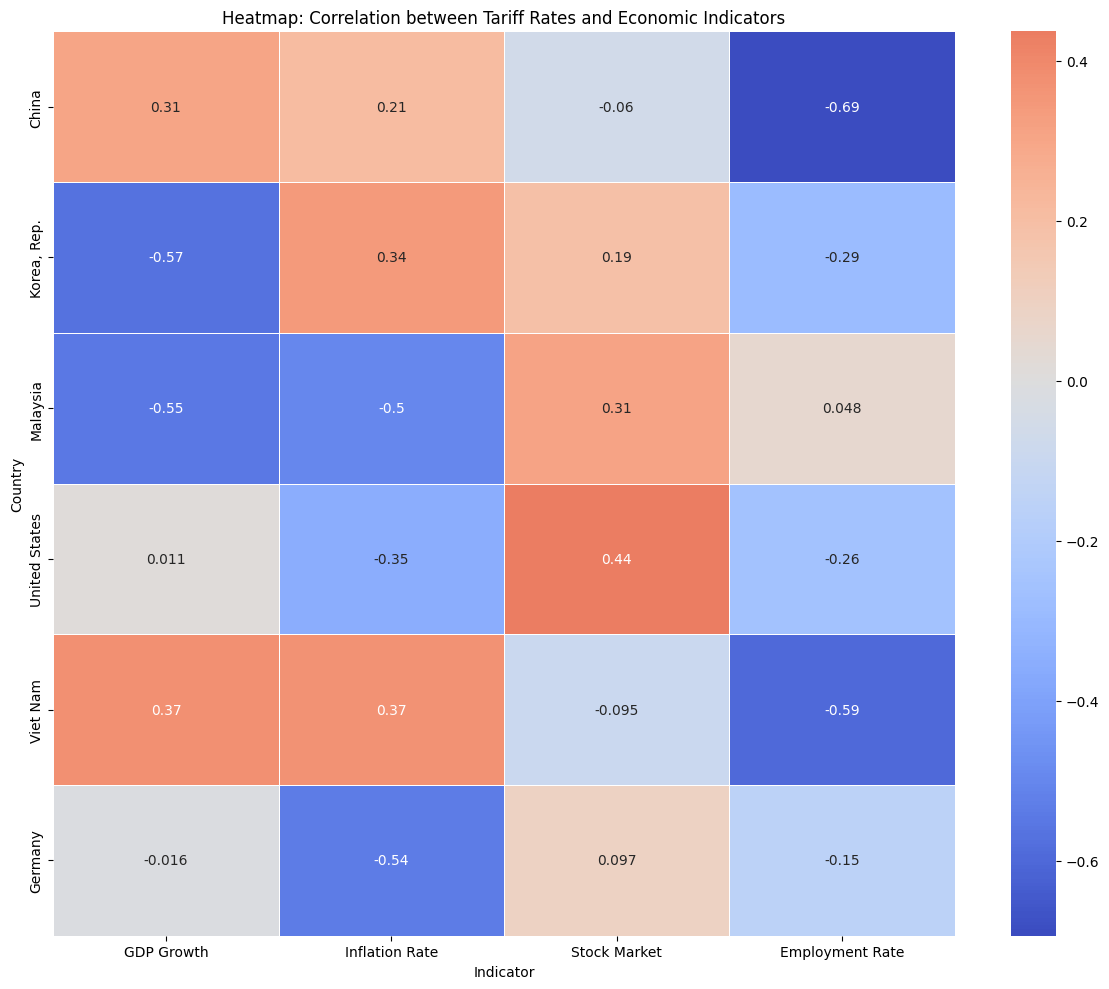

In [11]:
# Create a DataFrame of correlations (countries as rows, indicators as columns)
heatmap_data = {
    indicator: dict(indicator_correlations[indicator])
    for indicator in indicators
}
heatmap_df = pd.DataFrame(heatmap_data)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Heatmap: Correlation between Tariff Rates and Economic Indicators')
plt.xlabel('Indicator')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('heatmap_tariff_economic_indicators.jpg', dpi=300, bbox_inches='tight')
plt.show()